# **NASA: Asteroids Classification**

## Introduction
### Dataset

### Problem and Objective

### Solution

## Data Pre-processing

In [10]:
DATA_FILE = 'nasa_db.csv'

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import math
from sklearn.preprocessing import LabelEncoder


### Creating a dataframe with the original dataset

In [11]:
data = pd.read_csv(DATA_FILE)

data.head()

,Neo Reference ID,Name,Absolute Magnitude,Est Dia in KM(min),Est Dia in KM(max),Est Dia in M(min),Est Dia in M(max),Est Dia in Miles(min),Est Dia in Miles(max),Est Dia in Feet(min),...,Asc Node Longitude,Orbital Period,Perihelion Distance,Perihelion Arg,Aphelion Dist,Perihelion Time,Mean Anomaly,Mean Motion,Equinox,Hazardous
0,3703080,3703080,21.6,0.127220,0.284472,127.219879,284.472297,0.079051,0.176763,417.388066,...,314.373913,609.599786,0.808259,57.257470,2.005764,2.458162e+06,264.837533,0.590551,J2000,True
1,3723955,3723955,21.3,0.146068,0.326618,146.067964,326.617897,0.090762,0.202951,479.225620,...,136.717242,425.869294,0.718200,313.091975,1.497352,2.457795e+06,173.741112,0.845330,J2000,False
2,2446862,2446862,20.3,0.231502,0.517654,231.502122,517.654482,0.143849,0.321655,759.521423,...,259.475979,643.580228,0.950791,248.415038,1.966857,2.458120e+06,292.893654,0.559371,J2000,True
3,3092506,3092506,27.4,0.008801,0.019681,8.801465,19.680675,0.005469,0.012229,28.876199,...,57.173266,514.082140,0.983902,18.707701,1.527904,2.457902e+06,68.741007,0.700277,J2000,False
4,3514799,3514799,21.6,0.127220,0.284472,127.219879,284.472297,0.079051,0.176763,417.388066,...,84.629307,495.597821,0.967687,158.263596,1.483543,2.457814e+06,135.142133,0.726395,J2000,True


### Pre-analysis
Before starting the analysis and do any data manipulation, its importante take a look at the dataset to understand the data, such as missing or null values and filter out any outliers.

In [12]:
data.describe()

,Neo Reference ID,Name,Absolute Magnitude,Est Dia in KM(min),Est Dia in KM(max),Est Dia in M(min),Est Dia in M(max),Est Dia in Miles(min),Est Dia in Miles(max),Est Dia in Feet(min),...,Semi Major Axis,Inclination,Asc Node Longitude,Orbital Period,Perihelion Distance,Perihelion Arg,Aphelion Dist,Perihelion Time,Mean Anomaly,Mean Motion
count,4.687000e+03,4.687000e+03,4687.000000,4687.000000,4687.000000,4687.000000,4687.000000,4687.000000,4687.000000,4687.000000,...,4687.000000,4687.000000,4687.000000,4687.000000,4687.000000,4687.000000,4687.000000,4.687000e+03,4687.000000,4687.000000
mean,3.272298e+06,3.272298e+06,22.267865,0.204604,0.457509,204.604203,457.508906,0.127135,0.284283,671.273653,...,1.400264,13.373844,172.157275,635.582076,0.813383,183.932151,1.987144,2.457728e+06,181.167927,0.738242
std,5.486011e+05,5.486011e+05,2.890972,0.369573,0.826391,369.573402,826.391249,0.229642,0.513496,1212.511199,...,0.524154,10.936227,103.276777,370.954727,0.242059,103.513035,0.951519,9.442264e+02,107.501623,0.342627
min,2.000433e+06,2.000433e+06,11.160000,0.001011,0.002260,1.010543,2.259644,0.000628,0.001404,3.315431,...,0.615920,0.014513,0.001941,176.557161,0.080744,0.006918,0.803765,2.450100e+06,0.003191,0.086285
25%,3.097594e+06,3.097594e+06,20.100000,0.033462,0.074824,33.462237,74.823838,0.020792,0.046493,109.784247,...,1.000635,4.962341,83.081208,365.605031,0.630834,95.625916,1.266059,2.457815e+06,87.006918,0.453289
50%,3.514799e+06,3.514799e+06,21.900000,0.110804,0.247765,110.803882,247.765013,0.068850,0.153954,363.529809,...,1.240981,10.311836,172.625393,504.947292,0.833153,189.761641,1.618195,2.457973e+06,185.718889,0.712946
75%,3.690060e+06,3.690060e+06,24.500000,0.253837,0.567597,253.837029,567.596853,0.157727,0.352688,832.798679,...,1.678364,19.511681,255.026909,794.195972,0.997227,271.777557,2.451171,2.458108e+06,276.531946,0.984669
max,3.781897e+06,3.781897e+06,32.100000,15.579552,34.836938,15579.552413,34836.938254,9.680682,21.646663,51114.018738,...,5.072008,75.406667,359.905890,4172.231343,1.299832,359.993098,8.983852,2.458839e+06,359.917991,2.039000


In [13]:
data.isna().any()

Neo Reference ID                False
Name                            False
Absolute Magnitude              False
Est Dia in KM(min)              False
Est Dia in KM(max)              False
Est Dia in M(min)               False
Est Dia in M(max)               False
Est Dia in Miles(min)           False
Est Dia in Miles(max)           False
Est Dia in Feet(min)            False
Est Dia in Feet(max)            False
Close Approach Date             False
Epoch Date Close Approach       False
Relative Velocity km per sec    False
Relative Velocity km per hr     False
Miles per hour                  False
Miss Dist.(Astronomical)        False
Miss Dist.(lunar)               False
Miss Dist.(kilometers)          False
Miss Dist.(miles)               False
Orbiting Body                   False
Orbit ID                        False
Orbit Determination Date        False
Orbit Uncertainity              False
Minimum Orbit Intersection      False
Jupiter Tisserand Invariant     False
Epoch Oscula

### Cleaning and preparing dataset
The dataset has no missing values, however, there are some columns that are not relevant for the analysis, as they show the same information under different measures that can be converted to each other. Therefore, we will remove these columns.
We decide keep the Km measure and remove the others.

In [14]:
data = data.drop(['Est Dia in M(min)'], axis=1)
data = data.drop(['Est Dia in M(max)'], axis=1)
data = data.drop(['Est Dia in Miles(min)'], axis=1)
data = data.drop(['Est Dia in Miles(max)'], axis=1)
data = data.drop(['Est Dia in Feet(min)'], axis=1)
data = data.drop(['Est Dia in Feet(max)'], axis=1)
data = data.drop(['Relative Velocity km per sec'], axis=1)
data = data.drop(['Miles per hour'], axis=1)
data = data.drop(['Miss Dist.(Astronomical)'], axis=1)
data = data.drop(['Miss Dist.(lunar)'], axis=1)
data = data.drop(['Miss Dist.(miles)'], axis=1)


data.head()

,Neo Reference ID,Name,Absolute Magnitude,Est Dia in KM(min),Est Dia in KM(max),Close Approach Date,Epoch Date Close Approach,Relative Velocity km per hr,Miss Dist.(kilometers),Orbiting Body,...,Asc Node Longitude,Orbital Period,Perihelion Distance,Perihelion Arg,Aphelion Dist,Perihelion Time,Mean Anomaly,Mean Motion,Equinox,Hazardous
0,3703080,3703080,21.6,0.127220,0.284472,1995-01-01,788947200000,22017.003799,62753692.0,Earth,...,314.373913,609.599786,0.808259,57.257470,2.005764,2.458162e+06,264.837533,0.590551,J2000,True
1,3723955,3723955,21.3,0.146068,0.326618,1995-01-01,788947200000,65210.346095,57298148.0,Earth,...,136.717242,425.869294,0.718200,313.091975,1.497352,2.457795e+06,173.741112,0.845330,J2000,False
2,2446862,2446862,20.3,0.231502,0.517654,1995-01-08,789552000000,27326.560182,7622911.5,Earth,...,259.475979,643.580228,0.950791,248.415038,1.966857,2.458120e+06,292.893654,0.559371,J2000,True
3,3092506,3092506,27.4,0.008801,0.019681,1995-01-15,790156800000,40225.948191,42683616.0,Earth,...,57.173266,514.082140,0.983902,18.707701,1.527904,2.457902e+06,68.741007,0.700277,J2000,False
4,3514799,3514799,21.6,0.127220,0.284472,1995-01-15,790156800000,35426.991794,61010824.0,Earth,...,84.629307,495.597821,0.967687,158.263596,1.483543,2.457814e+06,135.142133,0.726395,J2000,True


Such the columns _Orbit_ _Body_ and _Equinox_ have the same value for all rows, we will remove them as well.


In [15]:
count_values = data.groupby('Orbiting Body').size().reset_index(name='count')
print(count_values)
count_values = data.groupby('Equinox').size().reset_index(name='count')
print(count_values)

data = data.drop(['Orbiting Body'], axis=1)
data = data.drop(['Equinox'], axis=1)
data = data.drop(['Name'], axis=1)

data.head()


  Orbiting Body  count
0         Earth   4687
  Equinox  count
0   J2000   4687


,Neo Reference ID,Absolute Magnitude,Est Dia in KM(min),Est Dia in KM(max),Close Approach Date,Epoch Date Close Approach,Relative Velocity km per hr,Miss Dist.(kilometers),Orbit ID,Orbit Determination Date,...,Inclination,Asc Node Longitude,Orbital Period,Perihelion Distance,Perihelion Arg,Aphelion Dist,Perihelion Time,Mean Anomaly,Mean Motion,Hazardous
0,3703080,21.6,0.127220,0.284472,1995-01-01,788947200000,22017.003799,62753692.0,17,2017-04-06 08:36:37,...,6.025981,314.373913,609.599786,0.808259,57.257470,2.005764,2.458162e+06,264.837533,0.590551,True
1,3723955,21.3,0.146068,0.326618,1995-01-01,788947200000,65210.346095,57298148.0,21,2017-04-06 08:32:49,...,28.412996,136.717242,425.869294,0.718200,313.091975,1.497352,2.457795e+06,173.741112,0.845330,False
2,2446862,20.3,0.231502,0.517654,1995-01-08,789552000000,27326.560182,7622911.5,22,2017-04-06 09:20:19,...,4.237961,259.475979,643.580228,0.950791,248.415038,1.966857,2.458120e+06,292.893654,0.559371,True
3,3092506,27.4,0.008801,0.019681,1995-01-15,790156800000,40225.948191,42683616.0,7,2017-04-06 09:15:49,...,7.905894,57.173266,514.082140,0.983902,18.707701,1.527904,2.457902e+06,68.741007,0.700277,False
4,3514799,21.6,0.127220,0.284472,1995-01-15,790156800000,35426.991794,61010824.0,25,2017-04-06 08:57:58,...,16.793382,84.629307,495.597821,0.967687,158.263596,1.483543,2.457814e+06,135.142133,0.726395,True


The target variable is a categorical variable, so we will encode it to numerical values in order to use it in the model. 
The other variables are already numerical, so we don't need to encode them.

In [16]:
encoder = LabelEncoder()

data['Hazardous'] = encoder.fit_transform(data['Hazardous'])

data.head()


,Neo Reference ID,Absolute Magnitude,Est Dia in KM(min),Est Dia in KM(max),Close Approach Date,Epoch Date Close Approach,Relative Velocity km per hr,Miss Dist.(kilometers),Orbit ID,Orbit Determination Date,...,Inclination,Asc Node Longitude,Orbital Period,Perihelion Distance,Perihelion Arg,Aphelion Dist,Perihelion Time,Mean Anomaly,Mean Motion,Hazardous
0,3703080,21.6,0.127220,0.284472,1995-01-01,788947200000,22017.003799,62753692.0,17,2017-04-06 08:36:37,...,6.025981,314.373913,609.599786,0.808259,57.257470,2.005764,2.458162e+06,264.837533,0.590551,1
1,3723955,21.3,0.146068,0.326618,1995-01-01,788947200000,65210.346095,57298148.0,21,2017-04-06 08:32:49,...,28.412996,136.717242,425.869294,0.718200,313.091975,1.497352,2.457795e+06,173.741112,0.845330,0
2,2446862,20.3,0.231502,0.517654,1995-01-08,789552000000,27326.560182,7622911.5,22,2017-04-06 09:20:19,...,4.237961,259.475979,643.580228,0.950791,248.415038,1.966857,2.458120e+06,292.893654,0.559371,1
3,3092506,27.4,0.008801,0.019681,1995-01-15,790156800000,40225.948191,42683616.0,7,2017-04-06 09:15:49,...,7.905894,57.173266,514.082140,0.983902,18.707701,1.527904,2.457902e+06,68.741007,0.700277,0
4,3514799,21.6,0.127220,0.284472,1995-01-15,790156800000,35426.991794,61010824.0,25,2017-04-06 08:57:58,...,16.793382,84.629307,495.597821,0.967687,158.263596,1.483543,2.457814e+06,135.142133,0.726395,1


### Analysis
Since the dataset is already clean, we will proceed to the analysis of the data, to get some insights and understand it better.

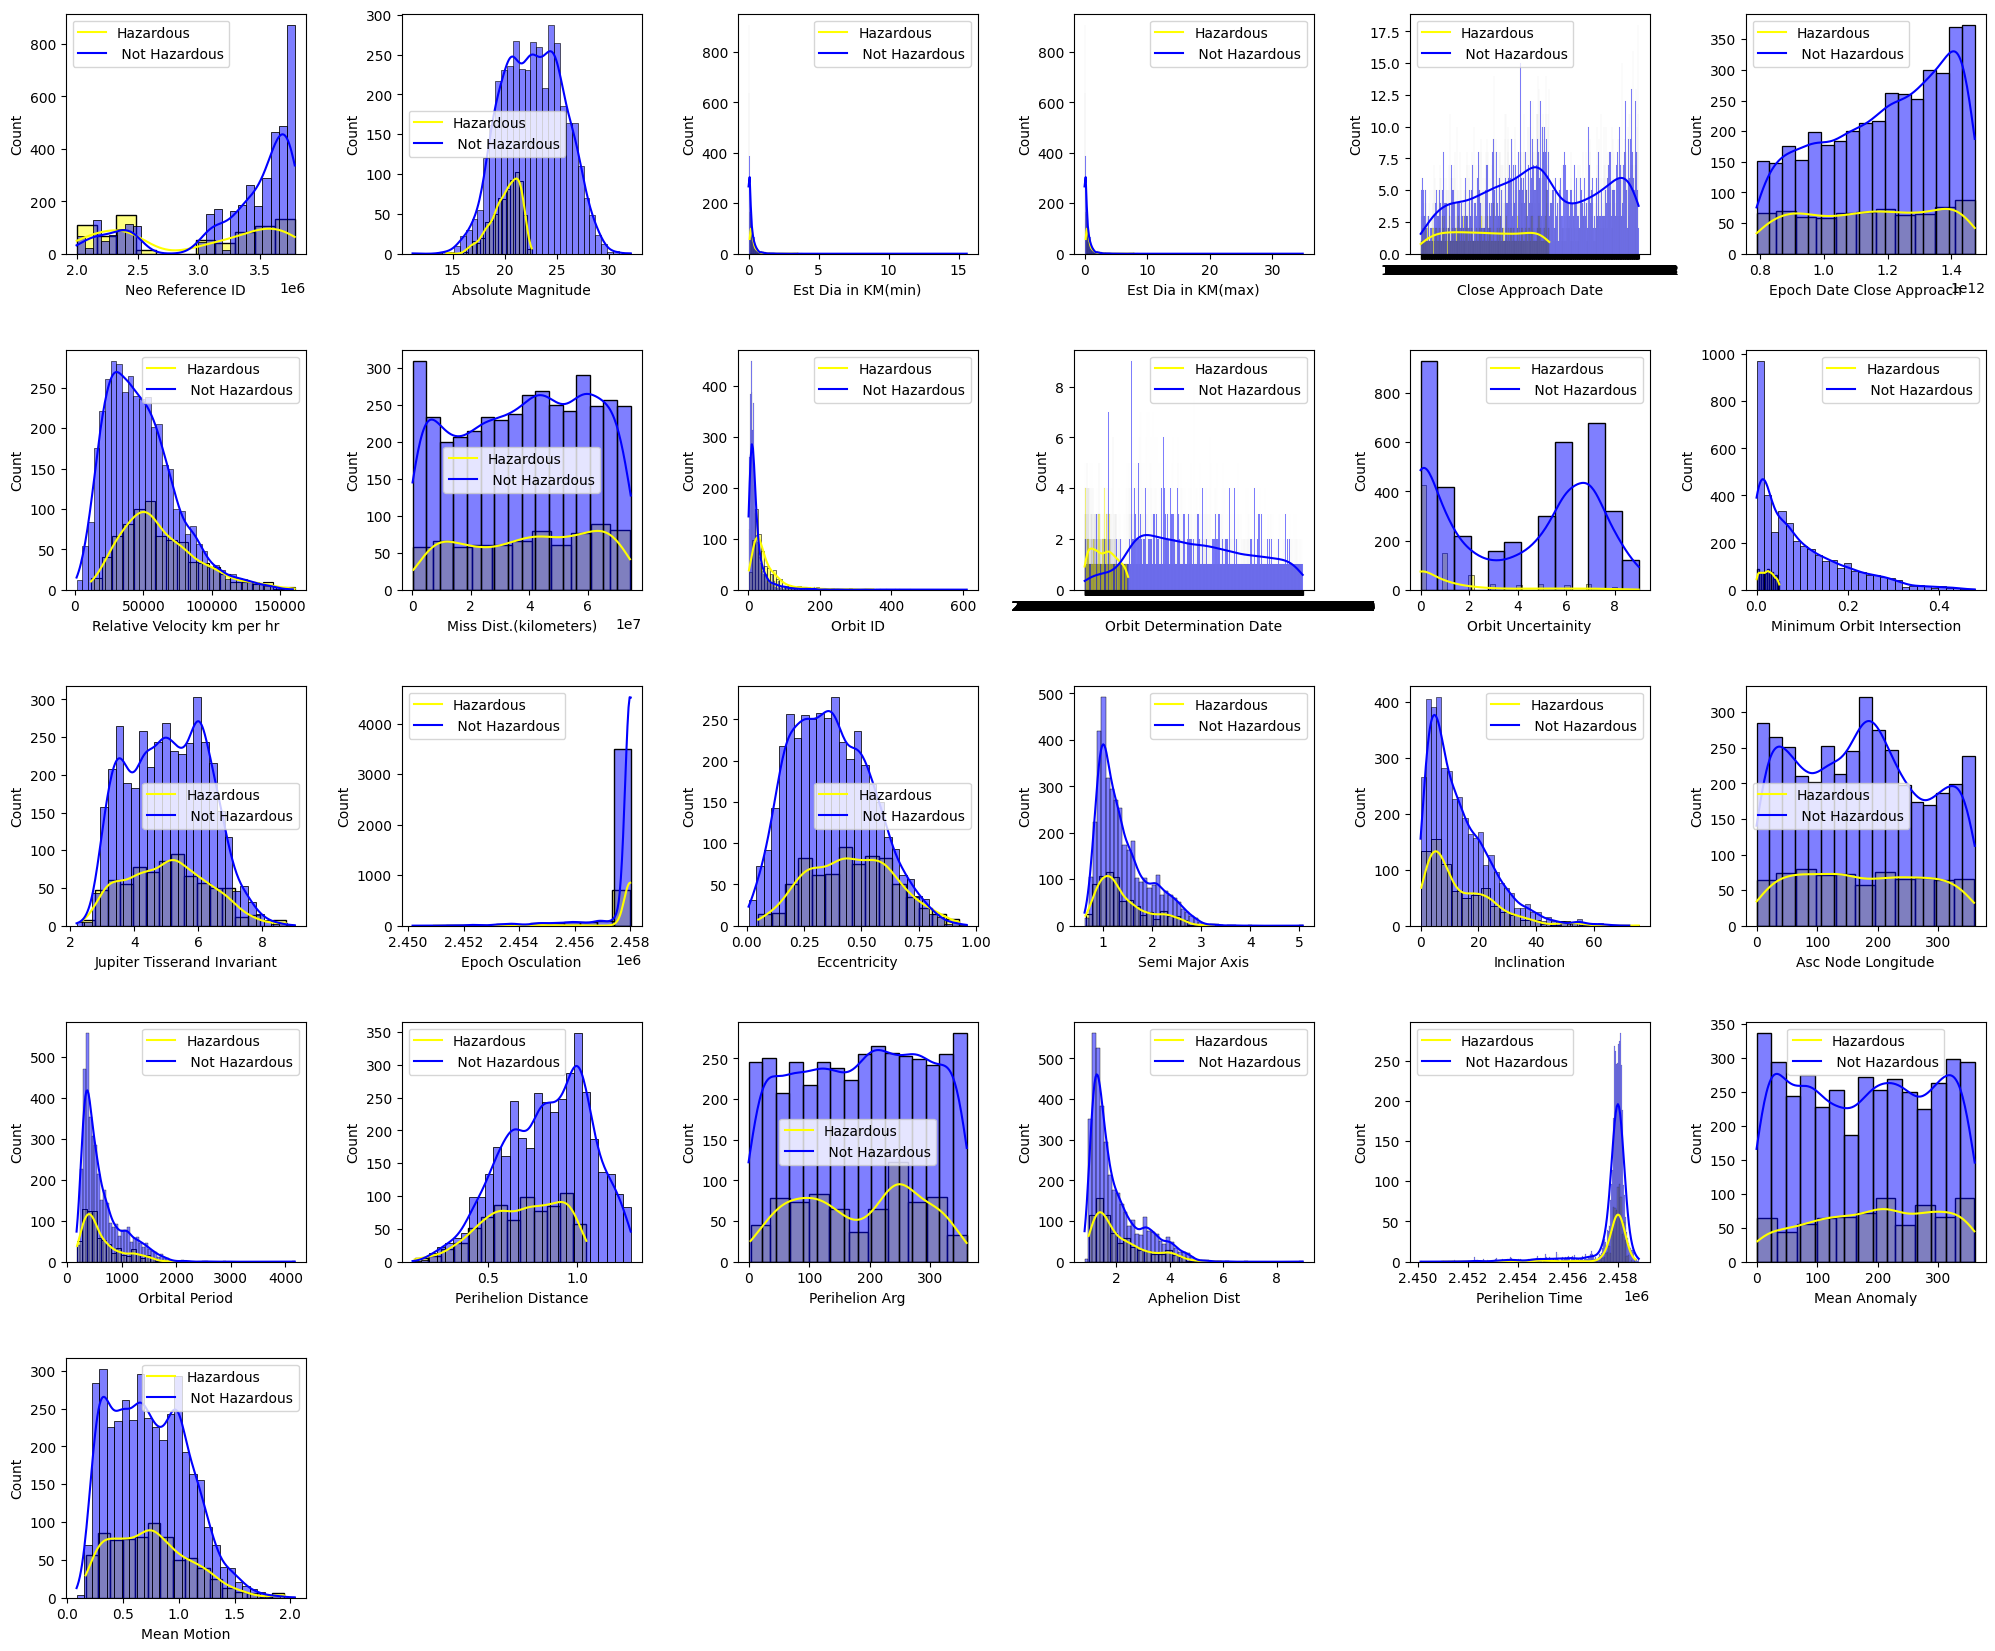

In [19]:
plt.figure(figsize=(24,24))
plt.subplots_adjust(left=0.1,bottom=0.1,right=0.9,top=0.9,wspace=0.4,hspace=0.4)

data1 = data[data['Hazardous']==1].drop(['Hazardous'],axis=1)
data2 = data[data['Hazardous']==0].drop(['Hazardous'],axis=1)

cols = list(data1.columns)

for i, col in enumerate(cols):
   
    plt.subplot(6,6,i+1)
    sb.histplot(data=data1[col], color='yellow', label = 'Hazardous', kde=True)
    sb.histplot(data=data2[col], color='blue', label = ' Not Hazardous', kde=True)
    _,axes = plt.gca().get_legend_handles_labels()
    plt.legend(axes,prop={'size': 10})

plt.show()

After that, we can see the plot of the correlation matrix, which shows the correlation between the variables.

<Axes: >

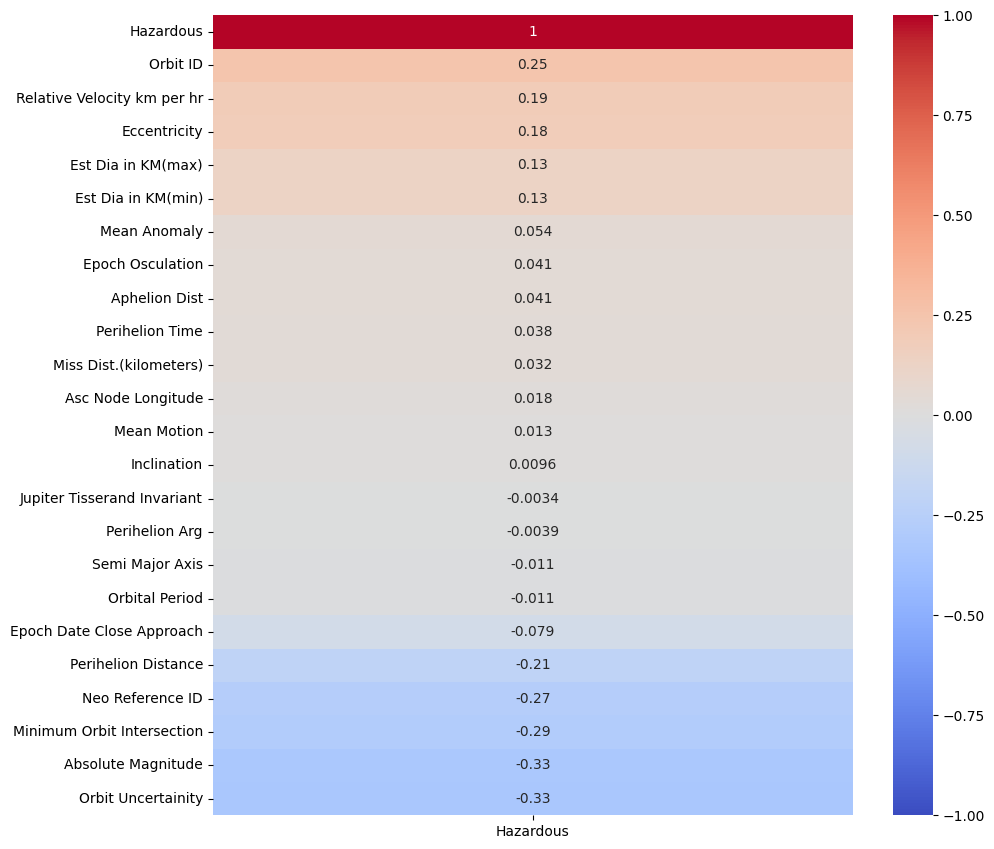

In [21]:
cols = list(data1.columns)

plt.figure(figsize=(10,10))
plt.subplots_adjust(left=0.1,bottom=0.1,right=0.9,top=0.9,wspace=0.4,hspace=0.4)

data3 = data.drop(['Close Approach Date'],axis=1)
data3 = data3.drop(['Orbit Determination Date'],axis=1)
corr = data3.corr()[['Hazardous']].sort_values(by='Hazardous', ascending=False)
sb.heatmap(corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1)

As we can see from the correlation matrix, the variables are not highly correlated with each other.

From this analysis, we can see that the dataset is unbalanced, with more than 90% of the asteroids being non-hazardous. This can be a problem when training the model, as it can be biased to predict that all asteroids are non-hazardous. We will need to balance the dataset before training the model.